In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

import itertools

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D
from keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical
from keras import optimizers
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

from keras.datasets import mnist

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
import random as rn

import os

1784
0
0


c:\Users\Jesse\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

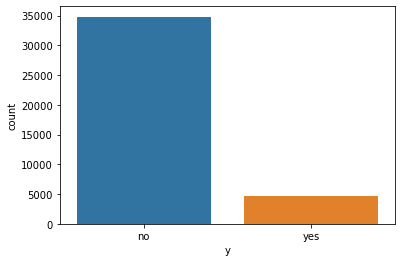

In [21]:
#Load Data and review content
baning_data = pd.read_csv("bank.csv")

# print("\nLoaded Data :\n------------------------------------")
# print(baning_data.head())
np.random.seed(0)
# baning_data.info()
print(baning_data.duplicated().sum())
baning_data.drop_duplicates(inplace=True)
print(baning_data.duplicated().sum())
print(baning_data.isnull().sum().sum())

sns.countplot('y',data=baning_data)

In [33]:
# baning_data.loan = baning_data.loan.map({'yes': 1, 'unknown': 0, 'no' : 0}).astype('uint8')
# baning_data.housing = baning_data.housing.map({'yes': 1, 'unknown': 0, 'no' : 0}).astype('uint8')
# baning_data.default = baning_data.default.map({'no': 1, 'unknown': 0, 'yes': 0}).astype('uint8')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for key in ["age", "job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "y"]:
    baning_data[key] = le.fit_transform(baning_data[key])


x = baning_data.iloc[:,:-1]
y = baning_data.iloc[:,-1]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.7)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

feature_train, feature_val, label_train, label_val = train_test_split(x_train, y_train, test_size = 0.1)


(11821, 19)
(27583, 19)
(11821,)
(27583,)


In [44]:
model = Sequential()

model.add(Dense(16, input_dim=19, activation='relu', name= 'input'))
model.add(Dense(32, activation='relu', name= 'hidden_1'))
model.add(Dense(64,  activation='relu', name= 'hidden_2'))
# model.add(Dense(128, activation='relu', name= 'hidden_3'))
# model.add(Dense(256,  activation='relu', name= 'hidden_4'))
# model.add(Dense(512, activation='relu', name= 'hidden_5'))
model.add(Dense(1, input_dim=16, activation='sigmoid', name= 'output'))

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 16)                320       
                                                                 
 hidden_1 (Dense)            (None, 32)                544       
                                                                 
 hidden_2 (Dense)            (None, 64)                2112      
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 3,041
Trainable params: 3,041
Non-trainable params: 0
_________________________________________________________________
None


In [45]:
opt = Adam(learning_rate= 0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics= ['accuracy'])

training_results = model.fit(feature_train, label_train, verbose=1, batch_size=175, epochs=50 , validation_data= (feature_val,label_val))

Epoch 1/50
61/61 [==============================] - 1s 3ms/step - loss: 0.4370 - accuracy: 0.8613 - val_loss: 0.3153 - val_accuracy: 0.8943
Epoch 2/50
61/61 [==============================] - 0s 1ms/step - loss: 0.3155 - accuracy: 0.8893 - val_loss: 0.2971 - val_accuracy: 0.8943
Epoch 3/50
61/61 [==============================] - 0s 1ms/step - loss: 0.3054 - accuracy: 0.8914 - val_loss: 0.2943 - val_accuracy: 0.8977
Epoch 4/50
61/61 [==============================] - 0s 1ms/step - loss: 0.3007 - accuracy: 0.8899 - val_loss: 0.2921 - val_accuracy: 0.8935
Epoch 5/50
61/61 [==============================] - 0s 2ms/step - loss: 0.2975 - accuracy: 0.8930 - val_loss: 0.2927 - val_accuracy: 0.8935
Epoch 6/50
61/61 [==============================] - 0s 1ms/step - loss: 0.2952 - accuracy: 0.8928 - val_loss: 0.2959 - val_accuracy: 0.8893
Epoch 7/50
61/61 [==============================] - 0s 1ms/step - loss: 0.2938 - accuracy: 0.8930 - val_loss: 0.2946 - val_accuracy: 0.8926
Epoch 8/50
61/61 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


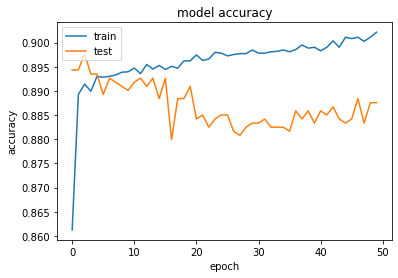

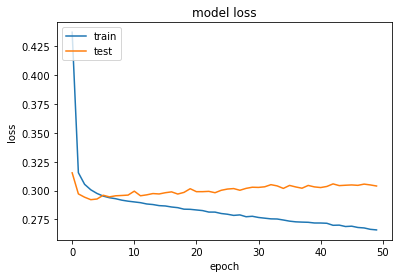

In [46]:
# list all data in history
print(training_results.history.keys())
#summarize history for accuracy
#plt.figure(figsize=(20,20))
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(training_results.history['loss'])
plt.plot(training_results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
results = model.evaluate(x_test, y_test)
results

862/862 [==============================] - 1s 783us/step - loss: 0.2950 - accuracy: 0.8950


[0.29498419165611267, 0.8950440287590027]